# 1. Coletando e preparando os dados

## Importando bibliotecas 

In [6]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

## Importando os dados

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/adaoduque/Brasileirao_Dataset/master/campeonato-brasileiro-estatisticas-full.csv', index_col=0)
brasileirao = pd.read_csv('https://raw.githubusercontent.com/herozandn/estatistica_2/main/C%C3%B3digos/campeonato-brasileiro-full.csv', index_col=0)

## Tratando os dados

Verificar onde estão os dados faltantes para fatiar o dataframe

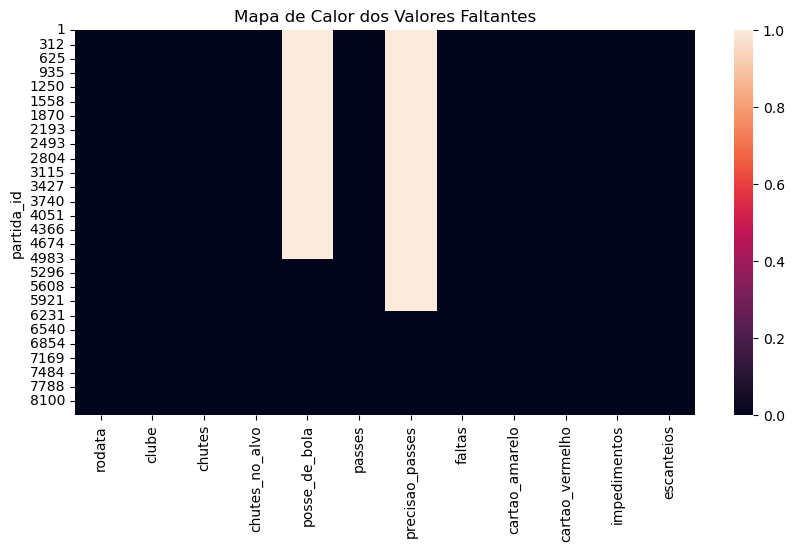

In [11]:
plt.figure(figsize=(10, 5))

sb.heatmap(df.isnull())
plt.title('Mapa de Calor dos Valores Faltantes')
plt.show()

Podemos notar acima que a partir de 2018 é a edição do campeonato brasileiro que temos menos dados faltantes

In [13]:
df_novo = df.loc[6126:8025]
df_novo.head() # df de 2018 até 2022

,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
partida_id,,,,,,,,,,,,
6126,1,Cruzeiro,12,2,40%,425,81%,20,3,0,0,7
6126,1,Gremio,6,2,60%,649,86%,15,1,1,3,4
6127,1,Vitoria,21,6,66%,545,88%,24,3,0,2,4
6127,1,Flamengo,10,5,34%,286,72%,10,2,1,2,5
6128,1,Santos,22,3,54%,532,90%,7,0,0,1,4


In [14]:
# Criar uma matriz booleana para valores nulos e zeros
is_null = df_novo.isnull()
is_zero = df_novo == 0

# Combinar as duas matrizes booleanas em uma só, atribuindo diferentes valores
# np.nan (valores não nulos e não zero), 0 (valores zero), 1 (valores nulos)
matrix = np.where(is_null, 1, np.where(is_zero, 0, np.nan))

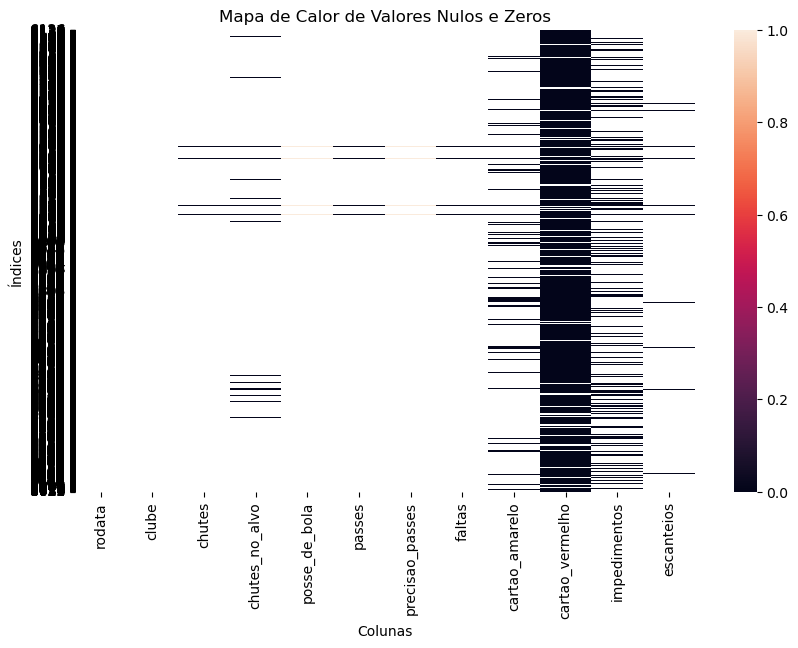

In [15]:
# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar o mapa de calor
sb.heatmap(matrix, yticklabels=df_novo.index, xticklabels=df_novo.columns)

# Adicionar título e rótulos aos eixos
plt.title('Mapa de Calor de Valores Nulos e Zeros')
plt.xlabel('Colunas')
plt.ylabel('Índices')

# Mostrar o gráfico
plt.show()

In [16]:
#Preenchendo as lacunas de variáveis 'object' com 0

try:
    df_novo['posse_de_bola'] = df_novo.loc[:, 'posse_de_bola'].fillna(0)
    df_novo['precisao_passes'] = df_novo.loc[:, 'precisao_passes'].fillna(0)
except SettingWithCopyWarning:
    print('Preenchimento concluído')

C:\Users\henri\AppData\Local\Temp\ipykernel_26276\1954759344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novo['posse_de_bola'] = df_novo.loc[:, 'posse_de_bola'].fillna(0)
C:\Users\henri\AppData\Local\Temp\ipykernel_26276\1954759344.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novo['precisao_passes'] = df_novo.loc[:, 'precisao_passes'].fillna(0)


In [17]:
lista = df_novo.columns.to_list()

#Visualiza os valores únicos para cada uma das colunas
for column in df_novo[lista]:
    print(f"Valores únicos da coluna '{column}': {df_novo[column].unique()}")

Valores únicos da coluna 'rodata': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 20 18 19 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Valores únicos da coluna 'clube': ['Cruzeiro' 'Gremio' 'Vitoria' 'Flamengo' 'Santos' 'Ceara' 'America-MG'
 'Sport' 'Vasco' 'Atletico-MG' 'Internacional' 'Bahia' 'Fluminense'
 'Corinthians' 'Athletico-PR' 'Chapecoense' 'Parana' 'Sao Paulo'
 'Botafogo-RJ' 'Palmeiras' 'Avai' 'CSA' 'Fortaleza' 'Goias' 'Coritiba'
 'Bragantino' 'Atletico-GO' 'Juventude' 'Cuiaba']
Valores únicos da coluna 'chutes': [12  6 21 10 22 14 15 19 11 13 18  7  8  9 17  3 16 20  5 23 28  4 24 26
 29  2 27  1 25  0 30 33 32 31 37 35 36]
Valores únicos da coluna 'chutes_no_alvo': [ 2  6  5  3  4  7  8  1 11  0 12  9 10 16 13 14]
Valores únicos da coluna 'posse_de_bola': ['40%' '60%' '66%' '34%' '54%' '46%' '38%' '62%' '67%' '33%' '45%' '55%'
 '35%' '65%' '70%' '30%' '48%' '52%' '49%' '51%' '61%' '39%' '31%' '69%'
 '64%' '36%' '44%' '56%' '28%' '72%' '42%' '58%' '59%' '41

In [18]:
#Transformando os valores 'object' em 'float'

try:
    df_novo['posse_de_bola'] = df_novo['posse_de_bola'].str.replace('%', '').astype(float) / 100
    df_novo['precisao_passes'] = df_novo['precisao_passes'].str.replace('%', '').astype(float) / 100
except AttributeError:
    print('Transformação já executada')

C:\Users\henri\AppData\Local\Temp\ipykernel_26276\752452056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novo['posse_de_bola'] = df_novo['posse_de_bola'].str.replace('%', '').astype(float) / 100
C:\Users\henri\AppData\Local\Temp\ipykernel_26276\752452056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novo['precisao_passes'] = df_novo['precisao_passes'].str.replace('%', '').astype(float) / 100


As variáveis 'cartões amarelos', 'cartões vermelhos', 'escanteios' e 'impedimentos' podem muito bem não ocorrer nos jogos, portantos os times que apresentarem valores nulos nessas variáveis, permanecerão assim; **já as outras variáveis que apresentarem o mesmo comportamento, serão preenchidas com os valores das médias das respectivas equipes** 

In [21]:
des = ['rodata', 'clube', 'cartao_amarelo', 'cartao_vermelho', 'impedimentos', 'escanteios']

for x in des:
    if x in lista and x in des:
        lista.remove(x)
        
#Lista com as variáveis que serão preenchidas com a média
lista

['chutes',
 'chutes_no_alvo',
 'posse_de_bola',
 'passes',
 'precisao_passes',
 'faltas']

In [22]:
valores_medios = df_novo.replace(0, np.nan).groupby('clube').mean().to_dict()

# Função para substituir 0 pela média do grupo
def replace_zero_with_mean(row):
    for col in lista:
        if row[col] == 0 or pd.isna(row[col]):
            row[col] = valores_medios[col][row['clube']]
    return row

# Aplicar a função ao DataFrame
df_novo = df_novo.apply(replace_zero_with_mean, axis=1)

# Mostrar o DataFrame resultante
df_novo

,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
partida_id,,,,,,,,,,,,
6126,1,Cruzeiro,12.0,2.0,0.40,425.0,0.81,20.0,3,0,0,7
6126,1,Gremio,6.0,2.0,0.60,649.0,0.86,15.0,1,1,3,4
6127,1,Vitoria,21.0,6.0,0.66,545.0,0.88,24.0,3,0,2,4
6127,1,Flamengo,10.0,5.0,0.34,286.0,0.72,10.0,2,1,2,5
6128,1,Santos,22.0,3.0,0.54,532.0,0.90,7.0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
8023,38,Atletico-MG,17.0,7.0,0.41,351.0,0.82,19.0,6,0,0,4
8024,38,Palmeiras,11.0,2.0,0.52,306.0,0.82,17.0,3,0,2,5
8024,38,Internacional,15.0,8.0,0.48,287.0,0.77,13.0,2,0,1,6


In [23]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3800 entries, 6126 to 8025
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rodata           3800 non-null   int64  
 1   clube            3800 non-null   object 
 2   chutes           3800 non-null   float64
 3   chutes_no_alvo   3800 non-null   float64
 4   posse_de_bola    3800 non-null   float64
 5   passes           3800 non-null   float64
 6   precisao_passes  3800 non-null   float64
 7   faltas           3800 non-null   float64
 8   cartao_amarelo   3800 non-null   int64  
 9   cartao_vermelho  3800 non-null   int64  
 10  impedimentos     3800 non-null   int64  
 11  escanteios       3800 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 385.9+ KB


In [24]:
#Base transformada

df_novo.to_csv('dados_brasileirao_tratados.csv')

Agora temos nossa base de dados sem valores faltantes

# 2. Análise Exploratória

### Mandantes vencem mais?

* Vamos analisar a distribuição da variável ‘winner’ para encontrarmos uma das estatísticas mais relevantes sobre as partidas de futebol, nomeadamente, a de que o time que joga em casa sempre tem uma chance maior de vitória. Essa métrica será utilizada posteriormente para avaliarmos se o modelo preditivo será ao menos capaz de prever quantidades similares para as diferentes categorias

In [29]:
#Preparando base de dados

brasileirao_novo = brasileirao.loc[6126:]
brasileirao_novo.head()

,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
ID,,,,,,,,,,,,,,,
6126,1,14/4/2018,16:00,Cruzeiro,Gremio,4-2-3-1,4-2-3-1,L. Venker de Menezes,Renato Gaúcho,Gremio,Mineirão,0,1,MG,RS
6127,1,14/4/2018,19:02,Vitoria,Flamengo,4-2-3-1,4-1-4-1,V. Carmo Mancini,M. Nogueira Barbieri,-,Barradão,2,2,BA,RJ
6128,1,14/4/2018,21:03,Santos,Ceara,4-3-3,4-1-4-1,J. Ribeiro Ventura,M. Oliveira Chamusca,Santos,Estádio Municipal Paulo Machado de Carvalho,2,0,SP,CE
6129,1,15/4/2018,11:00,America-MG,Sport,4-1-4-1,4-3-2-1,E. Alves Moreira,N. Baptista Júnior,America-MG,Estádio Raimundo Sampaio,3,0,MG,PE
6130,1,15/4/2018,16:01,Vasco,Atletico-MG,4-1-4-1,4-1-4-1,J. Mannarino,T. Mendes Larghi,Vasco,Estádio Vasco da Gama,2,1,RJ,MG


In [30]:
#Função que verifica o parecer do jogo
def verificar_vencedor(linha):
    if linha['mandante_Placar'] > linha['visitante_Placar']:
        return 0
    elif linha['mandante_Placar'] < linha['visitante_Placar']:
        return 1
    else:
        return 2

#Aplicando a função    
brasileirao_novo.loc[:, 'resultado'] = brasileirao_novo.apply(verificar_vencedor, axis=1)

C:\Users\henri\AppData\Local\Temp\ipykernel_26276\3573598068.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brasileirao_novo.loc[:, 'resultado'] = brasileirao_novo.apply(verificar_vencedor, axis=1)


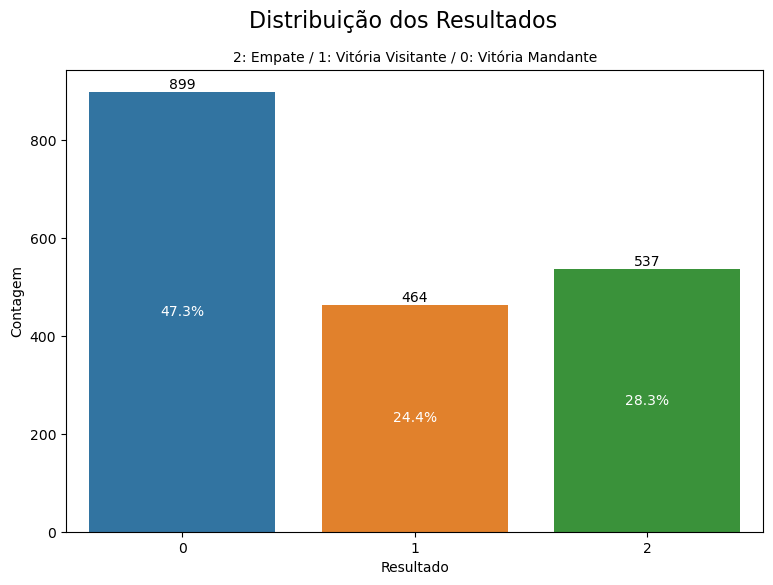

In [31]:
# Configurar o tamanho da figura
plt.figure(figsize=(9, 6))

# Criar o countplot
ax = sb.countplot(x='resultado', data=brasileirao_novo)

# Adicionar título e rótulos aos eixos
plt.suptitle('Distribuição dos Resultados', fontsize = 16)
plt.title('2: Empate / 1: Vitória Visitante / 0: Vitória Mandante', fontsize = 10)
plt.xlabel('Resultado')
plt.ylabel('Contagem')

total = len(brasileirao_novo)

for b in ax.patches:
    altura = b.get_height()
    porcentagem = 100 * altura / total
    
    ax.text(
        b.get_x() + b.get_width() / 2.,  # X position: center of the bar
        altura + 0.1,  # Y position: just above the bar
        f'{int(altura)}',  # Text to display (integer count)
        ha="center",  # Align horizontally center
        va="bottom"  # Align vertically bottom (text will be above the bar)
    )
    
    # Adicionar a porcentagem no centro da barra
    ax.text(
        b.get_x() + b.get_width() / 2.,  # X position: center of the bar
        altura / 2.,  # Y position: center of the bar
        f'{porcentagem:.1f}%',  # Text to display (percentage)
        ha="center",  # Align horizontally center
        va="center",  # Align vertically center
        color='white'  # Color of the text
    )
# Mostrar o gráfico
plt.show()

In [32]:
brasileirao_novo.to_csv('jogos_brasileirao.csv')